<IPython.core.display.Javascript object>


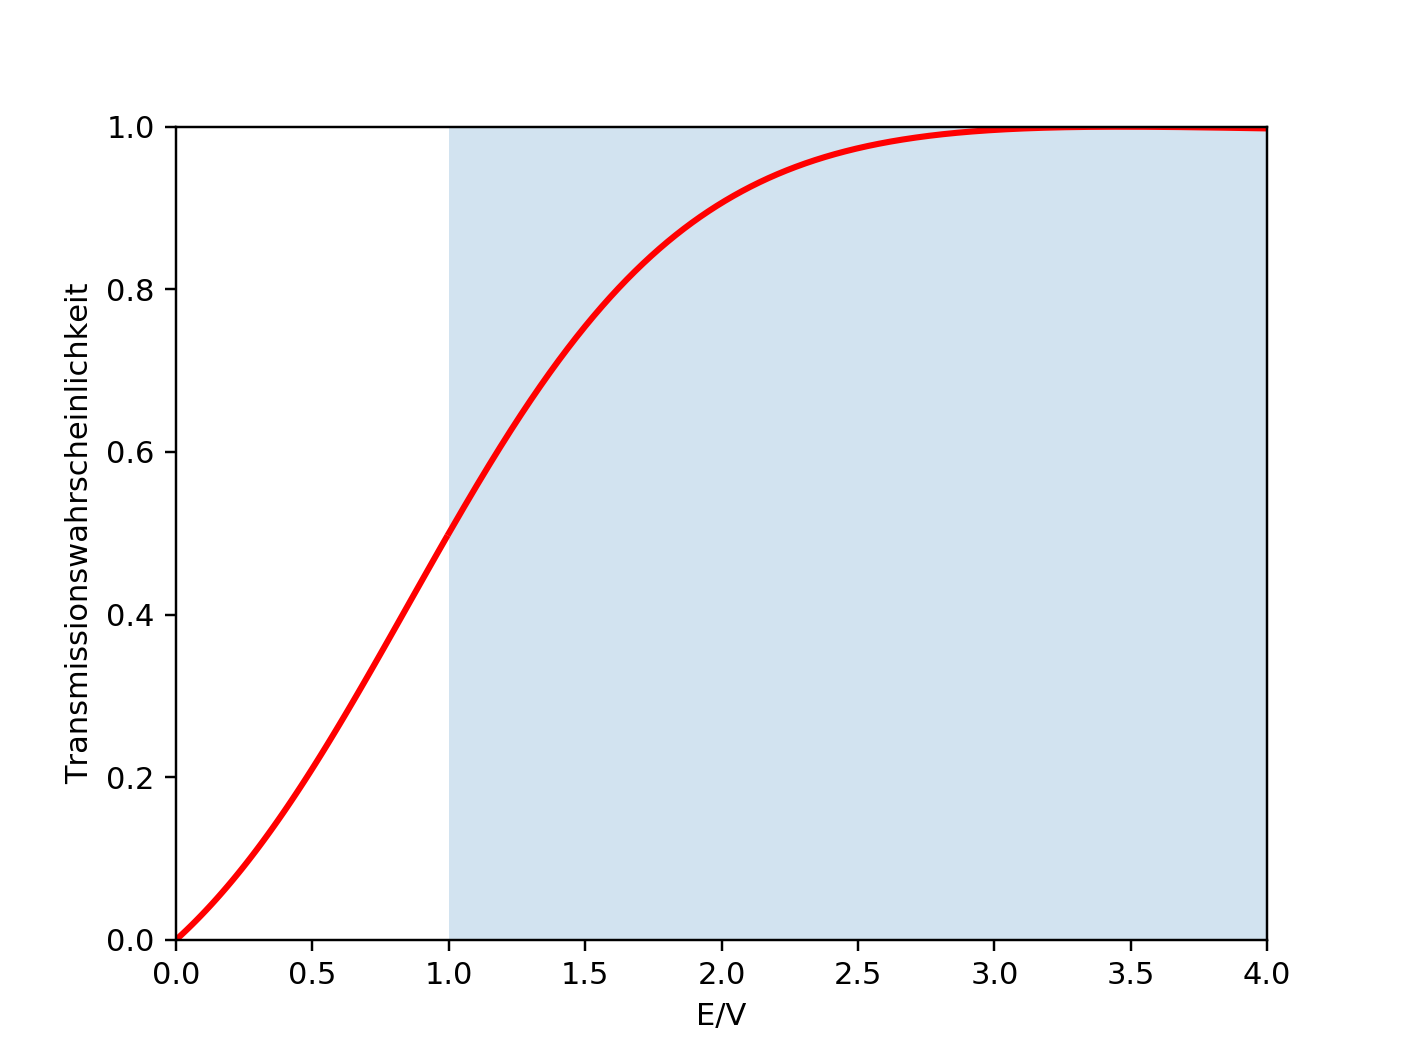

In [2]:
from pylab import *
from ipywidgets import *
import matplotlib.patches as patches
%matplotlib notebook

#initial values
m0 = 2
L0 = 1

#create plot and data
ev1 = arange(0.01, 1.0, 0.01)
ev2 = arange(1.001, 4.0, 0.001)

def kappa(EV, m):
    return sqrt(2*m*(1-EV))
def kappa_prime(EV, m):
        return sqrt(2*m*(EV-1))

def T1(EV, m, L):
    return 1.0 / (1+(exp(kappa(EV, m)*L)-exp(-kappa(EV, m))*L)**2/(16*EV*(1-EV)))
    
def T2(EV, m, L):
    return 1.0 / (1+(sin(kappa_prime(EV, m)*L))**2/(4*EV*(EV-1)))
    
t1 = T1(ev1, m0, L0)
t2 = T2(ev2, m0, L0)

fig1 = figure()
ax1 = fig1.add_subplot(111)
p = ax1.add_patch(patches.Rectangle((1.0, 0.0), 3.0, 1.0, alpha=0.2))
p_real, = plot(ev1, t1, lw=2, color='red')
p_imag, = plot(ev2, t2, lw=2, color='red')
axis([0, 4, 0, 1])
xlabel('E/V')
ylabel('Transmissionswahrscheinlichkeit')

@interact(m=(2, 100.0, 1))
def update(m=m0):
    p_real.set_ydata(T1(ev1, m, L0))
    p_imag.set_ydata(T2(ev2, m, L0))